## House Prices

* 주택 구매자에게 자신이 꿈꾸는 주택에 대해 설명하도록 요청하면 지하실 천장의 높이나 동서 철도와의 근접성으로 시작하지 않을 것입니다.
* 그러나 이 데이터 세트는 (그러한 특성이) 침실의 수나 흰색 울타리보다 가격 협상에 훨씬 더 많은 영향을 미친다는 것을 증명합니다.
* 아이오와주 에임스에 있는 주거용 주택의 (거의) 모든 측면을 설명하는 79개의 설명 변수가 있는 이 경쟁은 각 주택의 최종 가격을 예측하는 데 도전합니다.

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png"/>

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## 데이터 로드

In [ ]:
import os, platform

base_path = "house"
file_name = "house-price.zip"

def file_exist_check(base_path):
    
    if not os.path.exists(base_path):
        os.makedirs(base_path)
        
    if os.path.exists(f"{base_path}/train.csv"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return
    
    # colab
    if os.path.exists(f"{file_name}"):
        print(f"{base_path} 경로에 압축을 해제함")
        !unzip {file_name} -d {base_path}
        return
    else:
        print(f"""https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 에서 다운로드 하고
              실습 경로 {os.getcwd()}/{base_path}에 옮겨주세요.""")
        return
    
file_exist_check(base_path) 

house 경로에 압축을 해제함
Archive:  house-price.zip
  inflating: house/data_description.txt  
  inflating: house/sample_submission.csv  
  inflating: house/test.csv          
  inflating: house/train.csv         


In [ ]:
from glob import glob

glob("house/*")

['house/test.csv',
 'house/sample_submission.csv',
 'house/data_description.txt',
 'house/train.csv']

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv("house/train.csv", index_col="Id")
print(train.shape)
train.head(2)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [ ]:
train.tail(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
test = pd.read_csv("house/test.csv", index_col="Id")
print(test.shape)
test.head(2)

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [ ]:
# label 정답
set(train.columns) - set(test.columns)

{'SalePrice'}

In [ ]:
sub = pd.read_csv("house/sample_submission.csv", index_col="Id")
print(sub.shape)
sub.head(2)

(1459, 1)


,SalePrice
Id,
1461,169277.052498
1462,187758.393989


## 데이터 탐색

In [10]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

## 기술통계

In [12]:
# 결측치가 있는지
# 이상치가 있는지
# 표준편차는 어떤지
# 전체 피처에 대해 특이점이 없는지 확인
# 0~3 범위처럼 수치범위가 개수가 적다면 범주형데이터에 더 가깝습니다. => nunique 값으로 추가적인 확인이 필요
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## histplot

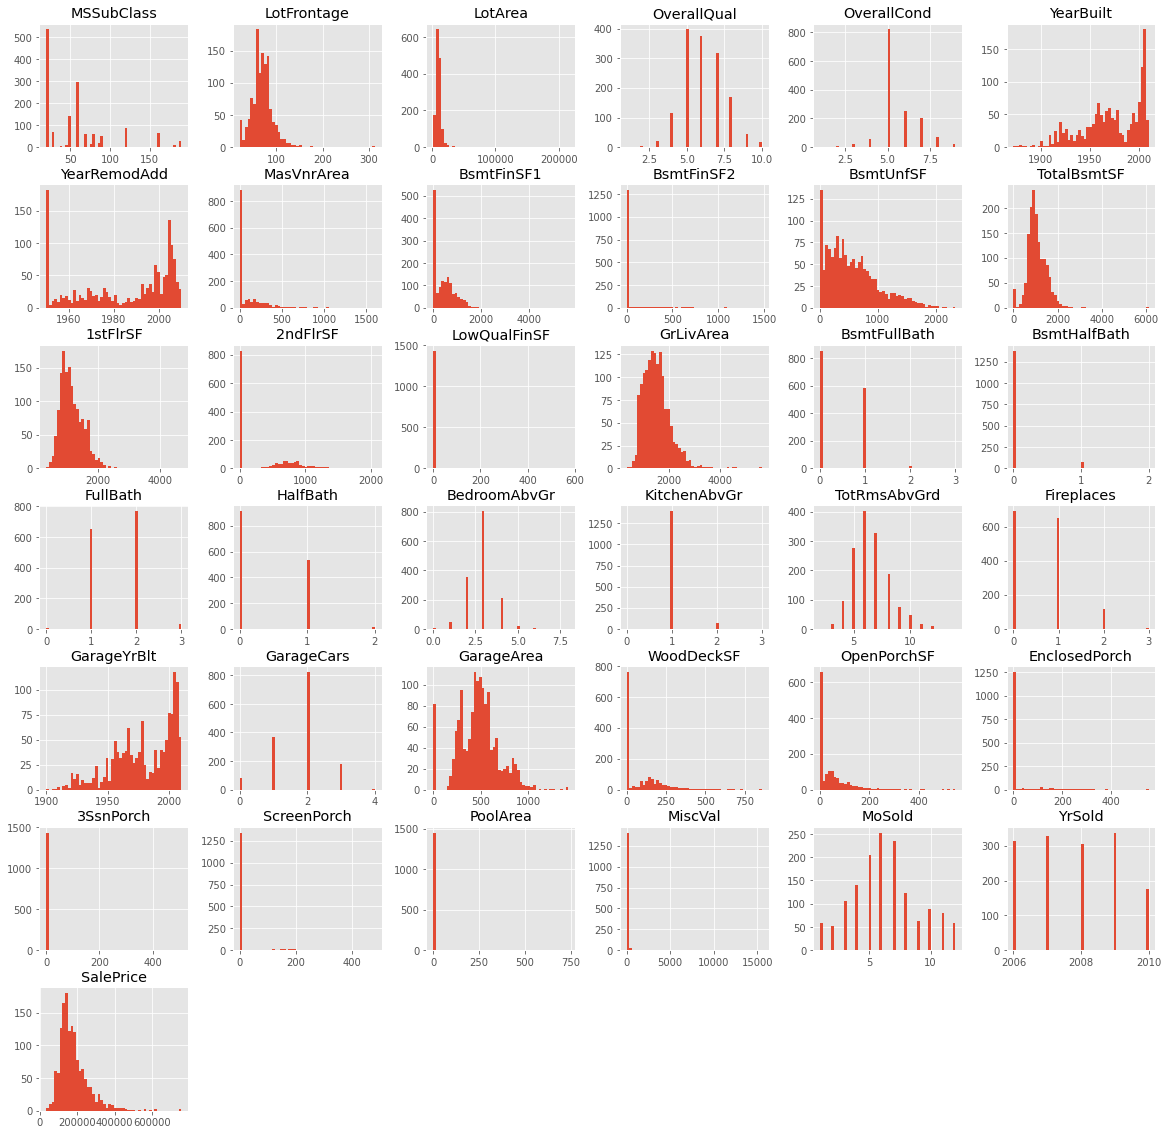

In [13]:
# 수치 데이터의 분포 확인, 첨도를 통해 너무 뾰족하지 않은지 => 한쪽에 데이터가 몰려있는지 확인
# 왜도 => 너무 한쪽에 치우쳐져 있지 않은지 확인
# 정규분포 형태인지 확인
# 막대가 떨어져 있다면 수치 데이터가 아니라 범주형 데이터가 아닌지 확인
# => 전처리를 한다면 학습과 예측에 도움이 될만한 피처엔지니어링 기법이 무엇이 있을지 고민!
train.hist(figsize=(20, 20), bins=50);

## 결측치 탐색

In [14]:
# 변수가 너무 많기 때문에 결측치가 있는 데이터만 가져와서 봅니다.
train_null = train.isnull().sum()
train_sum = train_null[train_null > 0].sort_values(ascending=False)
train_sum

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
# 결측치의 비율
train_na_mean = train.isnull().mean() * 100

pd.concat([train_null, train_na_mean], axis=1).loc[train_sum.index]

,0,1
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [16]:
test_null = test.isnull().sum()
test_na_sum = test_null[test_null > 0].sort_values(ascending=False)
test_na_sum

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [17]:
test_na_mean = test.isnull().mean() * 100

pd.concat([test_na_sum, test_na_mean], axis=1).loc[test_na_sum.index]

,0,1
PoolQC,1456.0,99.794380
MiscFeature,1408.0,96.504455
Alley,1352.0,92.666210
Fence,1169.0,80.123372
FireplaceQu,730.0,50.034270
LotFrontage,227.0,15.558602
GarageCond,78.0,5.346127
GarageYrBlt,78.0,5.346127
GarageQual,78.0,5.346127
GarageFinish,78.0,5.346127


## 이상치 탐색

In [18]:
# SalePrice
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

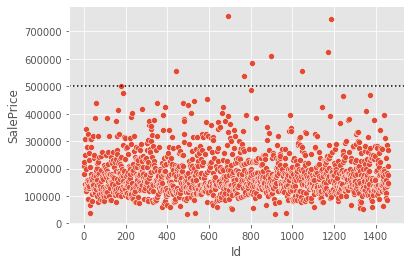

In [19]:
# 이상치 있을 때 어떻게 처리해야 할지?
# 이상치를 평균이나 중앙값 등으로 대체하면 데이터에 왜곡이 될 수 있으니 주의가 필요합니다.
# 여기에서는 주택가격을 예측하는 문제지만, 현실세계에서 풀어야할 문제 중에는 이상치를 탐지하는 문제도 있습니다.
sns.scatterplot(data=train, x=train.index, y="SalePrice")
plt.axhline(500000, c="k", ls=":")

## 희소값 탐색

In [21]:
# 범주형 변수의 개수가 많은 것 중에서 빈도가 균일한지 아닌지를 보기위해 nunique()을 통해 범주가 많은게 어떤 변수인지를 확인합니다.
# object type nunique
train.select_dtypes(include="object").nunique().nlargest(10)

Neighborhood    25
Exterior2nd     16
Exterior1st     15
Condition1       9
SaleType         9
Condition2       8
HouseStyle       8
RoofMatl         8
Functional       7
RoofStyle        6
dtype: int64

In [22]:
# 범주형 데이터 중에서 빈도가 적게 등장하는 값
# => one-hot-encoding 을 했을 때 범주가 적은 값을 피처로 만들어 주면 연산에 시간이 더 오래걸릴 수도 있고
# 오버피팅(과대적합)이 일어날수도 있습니다.
# 너무 희소값이라면 기타로 묶는 방법도 있고 아예 결측치로 처리하고 pd.get_dummies 혹은 OneHotEncoder를 사용했을 때 인코딩 하지 않습니다.

# Neighborhood - value_counts
ncount = train["Neighborhood"].value_counts()
ncount

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

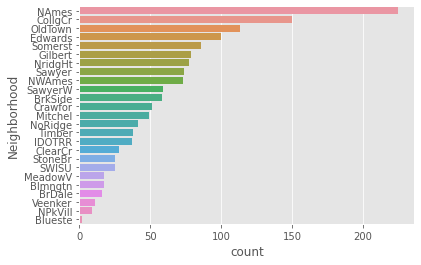

In [23]:
# countplot
# 희소값에 대해 one-hot-encoding 을 하게 되면 오버피팅이 발생할 수도 있고
# 너무 희소한 행렬이 생성되기 때문에 계산에 많은 자원이 필요합니다.
# 희소한 값을 사용하고자 한다면 1) 아예 희소값을 결측치 처리하면 one-hot-encoding 하지 않습니다.
# 2) 희소한 값을 "기타" 등으로 묶어줄 수도 있습니다.
sns.countplot(data=train, y="Neighborhood", order=ncount.index)

## 변수 스케일링과 트랜스포메이션


* Standard Scaler는 평균이 0, 표준편차가 1입니다.
    * Z-score scaling
    * z = (X - X.mean) / std

* MinMax Scaler는 최소값이 0, 최대값이 1입니다.
    * X_scaled = (X - X.min) / (X.max - X.min)

* Robust Scaler는 IQR을 기준으로 scaling 하기 때문에 Standard Scaler보다 더 큰 최소값, 더 작은 최대값을 갖게 됩니다.
    * X_scaled = (X - X.median) / IQR(75%-25%)

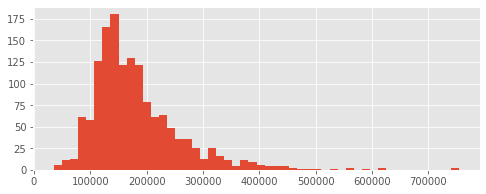

In [24]:
# SalePrice
train["SalePrice"].hist(bins=50, figsize=(8, 3));

In [25]:
# StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [26]:
# StandardScaler
# z = (x - u) / s
# z = (X - X.mean) / std
ss = StandardScaler()
ss

StandardScaler()

In [ ]:
# train[["SalePrice"]]

In [27]:
# StandardScaler의 fit 에는 matrix를 넣어주어야 하기 때문에
# Series가 아닌 DataFrame 으로 넣어주기 위해 대괄호를 두번 감싸서 데이터프레임으로 넣어주었습니다.
# 반환값도 matrix 형태이기 때문에 새로운 파생변수를 만들고자 한다면 데이터프레임 형태로 파생변수를 만들어 줍니다.
# 사이킷런의 다른 기능에서는 fit() => predict() 를 했었지만 전처리에서는 fit() => transform()을 사용합니다.

# 스케일링을 예시로 fit() 은 계산하기 위한 평균, 중앙값, 표준편차가 필요하다면 해당 데이터를 기준으로 기술통계값을 구하고
# 그 값을 기준으로 transform() 에서 계산을 적용해서 값을 변환해 줍니다.
# fit 은 train 에만 사용하고 transform() 은 train, test 에 사용합니다.
# fit 은 test 에 사용하지 않습니다. 왜냐하면 기준을 train으로 정하기 위해서 입니다.
# test 에는 train을 기준으로 학습한 것을 바탕으로 transform() 만 합니다.
train[["SalePrice_ss"]] = ss.fit(train[["SalePrice"]]).transform(train[["SalePrice"]])
train[["SalePrice", "SalePrice_ss"]].head(2)

,SalePrice,SalePrice_ss
Id,,
1,208500,0.347273
2,181500,0.007288


In [28]:
# inverse_transform() 은 원래 값으로 복원하는 기능을 합니다.
ss.inverse_transform(train[["SalePrice_ss"]])

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [29]:
# MinMaxScaler
# 주의 : 피처에 fit_transform 은 train 에만 사용해 주세요!
# test 에는 transform만 한다는 것을 기억해 주세요!
# test 에도 fit을 하게 되면 train, test 의 기준이 달라집니다.
mm = MinMaxScaler()
train[["SalePrice_mm"]] = mm.fit_transform(train[["SalePrice"]])

In [30]:
# RobustScaler

rs = RobustScaler()
train[["SalePrice_rs"]] = rs.fit_transform(train[["SalePrice"]])

In [31]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]]

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
Id,,,,
1,208500,0.347273,0.241078,0.541506
2,181500,0.007288,0.203583,0.220173
3,223500,0.536154,0.261908,0.720024
4,140000,-0.515281,0.145952,-0.273728
5,250000,0.869843,0.298709,1.035406
...,...,...,...,...
1456,175000,-0.074560,0.194556,0.142815
1457,210000,0.366161,0.243161,0.559357
1458,266500,1.077611,0.321622,1.231776


In [ ]:
# pd.options.display.float_format = '{:,.2f}'.format

In [32]:
# describe - "SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].describe().round(2)

,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs
count,1460.0,1460.00,1460.00,1460.00
mean,180921.2,0.00,0.20,0.21
std,79442.5,1.00,0.11,0.95
min,34900.0,-1.84,0.00,-1.52
25%,129975.0,-0.64,0.13,-0.39
50%,163000.0,-0.23,0.18,0.00
75%,214000.0,0.42,0.25,0.61
max,755000.0,7.23,1.00,7.05


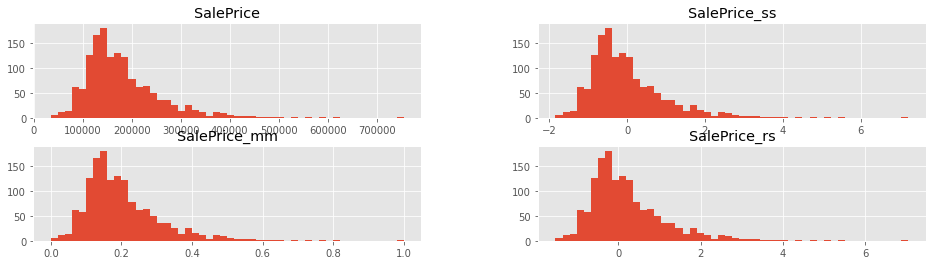

In [33]:
# histplot - "SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"
# x 축의 값은 다 다르지만 분포는 동일한 것을 확인할 수 있습니다.
train[["SalePrice", "SalePrice_ss", "SalePrice_mm", "SalePrice_rs"]].hist(bins=50, figsize=(16, 4));

In [35]:
# log1p - SalePrice, SalePrice_ss
# 표준 정규분포를 이루는지 확인해 보기 위해 실습합니다.
# 변환 순서에 따라 값이 어떻게 달라지는지 비교해 보겠습니다.
# SalePrice_ss 값에 로그를 취했을 때 경고메시지가 뜨는 이유는 가장 작은 값이 -1.84 로 1을 더해도 1보다 작은 값이 있기 때문입니다.
train["SalePrice_log1p"] = np.log1p(train["SalePrice"])
train["SalePrice_ss_log1p"] = np.log1p(train["SalePrice_ss"])

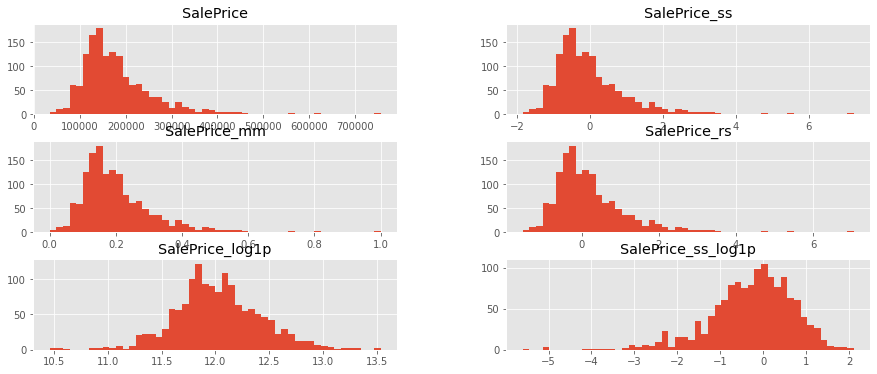

In [37]:
train[["SalePrice", "SalePrice_ss", "SalePrice_mm",
       "SalePrice_rs", "SalePrice_log1p", "SalePrice_ss_log1p"]].hist(bins=50, figsize=(15, 6));

In [38]:
train["SalePrice_log1p_ss"] = ss.fit_transform(train[["SalePrice_log1p"]])

In [39]:
train[["SalePrice_ss", "SalePrice_ss_log1p", 
       "SalePrice_log1p", "SalePrice_log1p_ss"]].describe().round(2)

,SalePrice_ss,SalePrice_ss_log1p,SalePrice_log1p,SalePrice_log1p_ss
count,1460.00,1336.00,1460.00,1460.00
mean,0.00,-0.27,12.02,-0.00
std,1.00,0.97,0.40,1.00
min,-1.84,-5.60,10.46,-3.92
25%,-0.64,-0.79,11.78,-0.62
50%,-0.23,-0.14,12.00,-0.06
75%,0.42,0.41,12.27,0.63
max,7.23,2.11,13.53,3.78


In [40]:
# ss = StandardScaler()
# SalePrice_log1p_ss
train[["SalePrice_log1p_ss"]] = ss.fit_transform(train[["SalePrice_log1p"]])

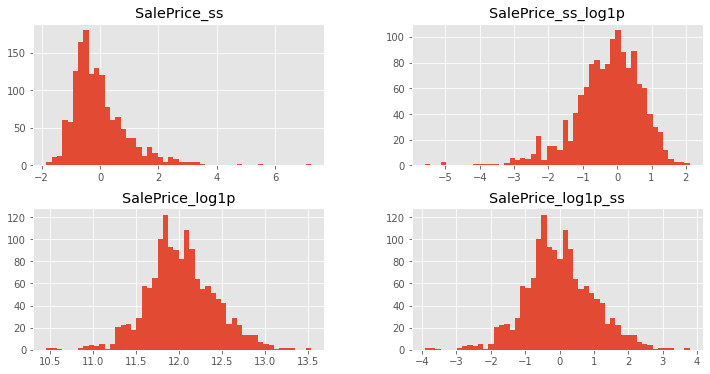

In [41]:
# histplot - SalePrice_ss, SalePrice_ss_log1p, SalePrice_log1p, SalePrice_log1p_ss
train[["SalePrice_ss", "SalePrice_ss_log1p", 
       "SalePrice_log1p", "SalePrice_log1p_ss"]].hist(figsize=(12, 6), bins=50);

## 지수함수, 로그함수 이해



<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="500">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.

* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8) :  e를 밑으로 하는 로그
* [자연로그의 밑 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8%EC%9D%98_%EB%B0%91)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8) : 10진 로그 혹은 밑이 10인 로그

In [42]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

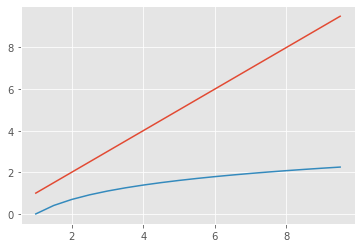

In [43]:
x = np.arange(1,10,0.5)
sns.lineplot(x=x, y=np.arange(1,10,0.5))
sns.lineplot(x=x, y=np.log(np.arange(1,10,0.5)))

In [44]:
np.log(-1)

<ipython-input-44-0cd3490738d5>:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

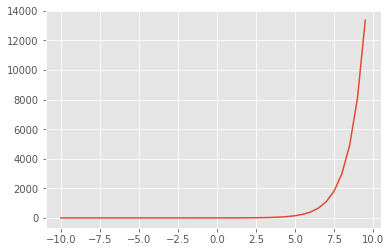

In [45]:
x = np.arange(-10,10,0.5)
sns.lineplot(x=x, y=np.exp(x))

In [ ]:
print("원본               : ", np.arange(1,10,0.5))
print("원본 => log => exp : ", np.exp(np.log(np.arange(1,10,0.5))))

## 이산화

In [47]:
# SalePrice - cut, qcut
# 이 방법은 RFM 기법에서도 종종 사용되는 방법으로 비즈니스 분석에 사용되기도 합니다.
# Recency, Frequency, Monetary => 고객이 얼마나 최근에, 자주, 많이 구매했는지를 분석할 때 사용합니다.
# 연속된 수치 데이터를 구간화합니다. => 머신러닝 알고리즘에 힌트를 줄 수도 있습니다.
# 트리모델이라면 너무 잘게 데이터를 나누지 않아 일반화 하는데 도움이 될 수도 있습니다.
# 그렇다면 데이터는 나누는 기준이 중요한데, EDA를 통해 어떻게 나누는 것이 예측에 도움이 될지 확인합니다.
# 연속된 수치데이터를 나누는 기준에 따라 모델의 성능에 영향을 주게 됩니다.
# 오히려 잘못나누면 모델의 성능이 떨어질 수도 있습니다.

train["SalePrice_cut"] = pd.cut(train["SalePrice"], bins=4, labels=[1, 2, 3, 4])
train["SalePrice_qcut"] = pd.qcut(train["SalePrice"], q=4, labels=[1, 2, 3, 4])

In [48]:
# "SalePrice_cut", "SalePrice_qcut" - value_counts
display(train["SalePrice_cut"].value_counts())
display(train["SalePrice_cut"].value_counts(1))
display(train["SalePrice_qcut"].value_counts())
display(train["SalePrice_qcut"].value_counts(1))

1    1100
2     330
3      25
4       5
Name: SalePrice_cut, dtype: int64

1    0.753425
2    0.226027
3    0.017123
4    0.003425
Name: SalePrice_cut, dtype: float64

2    367
3    366
1    365
4    362
Name: SalePrice_qcut, dtype: int64

2    0.251370
3    0.250685
1    0.250000
4    0.247945
Name: SalePrice_qcut, dtype: float64

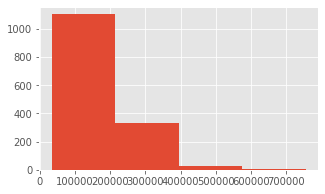

In [49]:
# hist 는 bins 로 막대의 개수를 설정할 수 있는데 pd.cut과 같은 개념입니다.
# pd.cut 은 절대평가와 유사합니다.
# 아래에서 SalePrice_cut 변수의 빈도를 시각화 하면 
# SalePrice 의 히스토그램의 막대를 4개 설정해서 그린것과 같습니다.
train["SalePrice"].hist(bins=4, figsize=(5, 3))

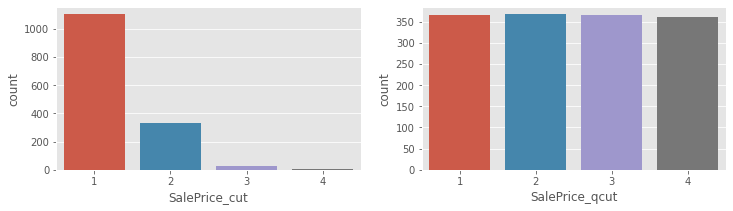

In [50]:
# "SalePrice_cut", "SalePrice_qcut" - countplot
# pd.qcut 은 상대평가와 유사한 개념이기 때문에 pd.qcut 으로 데이터를 분할하게 되면 비슷한 비율로 나눠주게 됩니다.

# 머신러닝에서 데이터를 분할해서 연속된 수치데이터를 => 이산화 해주는 이유는
# 머신러닝 알고리즘에 힌트를 줄 수도 있고, 너무 세분화된 조건으로 오버피팅(과대적합)되지 않도록 도움을 줄 수 있습니다.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
sns.countplot(data=train, x="SalePrice_cut", ax=axes[0])
sns.countplot(data=train, x="SalePrice_qcut", ax=axes[1])

## 인코딩
### pandas를 이용한 인코딩

```
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
```

In [51]:
# MSZoning - value_counts
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [52]:
# MSZoning - .cat.codes => Ordinal Encoding, 결과가 벡터, 1차원 형태로 나옵니다.
# 순서가 있는 명목형 데이터에 사용합니다. 예를 들어 기간의 1분기, 2분기, 3분기, 4분기
train["MSZoning"].astype("category").cat.codes

Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Length: 1460, dtype: int8

In [53]:
# get_dummies => One-hot-encoding, 결과가 matrix, 2차원 행렬 형태로 나옵니다.
# 순서가 없는 명목형 데이터에 사용합니다. 예를 들어 좋아하는 음료, 주택의 종류, 수업의 종류 등으로 
# 순서가 없거나 크기를 비교할 수 없는 데이터, 범주형 데이터에 사용합니다.
pd.get_dummies(train["MSZoning"])

,C (all),FV,RH,RL,RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


### scikit-learn을 이용한 인코딩

* https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets
* https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features


* 범주형 데이터 => 수치형 데이터
    * 0~N숫자로 바꿔준다면 Ordinal
    * 해당되는 것만 1로 만들어준다면 One-Hot
* LabelEncoder : 예를 들어 iris 꽃의 품종이 3가지인데, 이 값을 label로 지정할 때 예전 사이킷런에서는 꼭 인코딩 해주어야만 동작이 되었었어요.
* 그런데 버전이 업데이트 되면서 범주값을 그대로 입력해도 잘 동작합니다.
* 딥러닝 등을 사용할 label 값을 인코딩 해주어야 하는데 그때도 사이킷런을 함께 사용하기도 합니다.
* Ordinal Encoding은 Label Encoding과 달리 변수에 순서를 고려한다는 점에서 큰 차이를 갖습니다.  
* Label Encoding이 알파벳 순서 혹은 데이터셋에 등장하는 순서대로 매핑하는 것과 달리 
* Oridnal Encoding은 Label  변수의 순서 정보를 사용자가 지정해서 담을 수 있습니다.
* LabelEncoder 입력이 1차원 y 값, OrdinalEncoder  입력이 2차원 X값


In [54]:
# X는 feature, 독립변수, 2차원 array 형태, 학습할 피처, 예) 시험의 문제
# y는 label, 종속변수, target, 정답, 1차원 벡터, 예) 시험의 정답
# X는 보통 2차원으로 대문자로 표기하고 y는 소문자로 표기하는것이 꼭 그렇게 써야된다는 아니지만 관례처럼 사용하고 있습니다.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

print(list(le.classes_))
print(["tokyo", "tokyo", "paris"])
print(le.transform(["tokyo", "tokyo", "paris"]))

list(le.inverse_transform([2, 2, 1]))

['amsterdam', 'paris', 'tokyo']
['tokyo', 'tokyo', 'paris']
[2 2 1]


['tokyo', 'tokyo', 'paris']

In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], 
     ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
print(enc.transform([['female', 'from US', 'uses Safari']]))
print(enc.categories_)

[[0. 1. 1.]]
[array(['female', 'male'], dtype=object), array(['from Europe', 'from US'], dtype=object), array(['uses Firefox', 'uses Safari'], dtype=object)]


In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)
enc_out = enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()
print(enc_out)
print(enc.get_feature_names_out())
pd.DataFrame(enc_out, columns=enc.get_feature_names_out())

[[1. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 1.]]
['x0_female' 'x0_male' 'x1_from Europe' 'x1_from US' 'x2_uses Firefox'
 'x2_uses Safari']


,x0_female,x0_male,x1_from Europe,x1_from US,x2_uses Firefox,x2_uses Safari
0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0


In [57]:
# MSZoning_oe
oe = OrdinalEncoder()

In [58]:
# MSZoning_enc
train[["MSZoning_enc"]] = oe.fit_transform(train[["MSZoning"]])
print(oe.categories_)
train[["MSZoning", "MSZoning_enc"]].sample(3)

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)]


,MSZoning,MSZoning_enc
Id,,
395,RL,3.0
1329,RM,4.0
36,RL,3.0


In [59]:
# 사이킷런을 사용했을 때 train을 기준으로 fit 을 해주기 때문에 test 는 transform 만 해주면 됩니다.
# train 에는 없지만 test 에만 있는 값은 ohe 되지 않습니다.
# fit 하는 기준은 꼭 train 으로 합니다. 
# 왜냐하면 test 는 미래의 데이터이기 때문에 어떤 데이터가 들어올지 모르기 때문입니다.
# 경진대회 데이터는 test 가 무엇인지 알고 있지만 
# 일부 경진대회는 test 값을 반영해서 인코딩 하는 것을 금지하고 있기도 합니다.

# pandas 의 get_dummies 를 사용해서 인코딩 하면 train, test 따로 인코딩을 하게 됩니다.
# train 학습한 것을 기반으로 test 와 동일하게 피처를 생성해 주어야 하는데 이게 조금 다를 수 있습니다.
# 판다스로 train, test 각각 인코딩 했다면 피처의 수, 종류가 다를 수 있습니다. 
# 그런데! 학습, 예측을 할 때는 동일한 피처를 입력해 주어야 합니다. 개수도 동일해야 합니다.
# pandas 로 인코딩 한다면 set(train.columns) - (test.columns) 이런식으로 비교해서 맞춰주어야 합니다.
# 또, train 에만 등장하는 피처가 있다면  test 에도 동일하게 만들어 주어야 합니다.
# 가장 간단한 것은 concat 을 사용하는 방법입니다. 없는 값은 nan 으로 들어가게 되고 다시 train, test 를 나눠주면 됩니다.
# => 처음부터 concat 을 사용하고 나중에 나눠주면 이런 문제를 해결할 수 있습니다!
# => 그런데 test 에만 등장하는 데이터를 피처로 사용하지 말라는 경진대회 정책이 있을 때 이 방법은 규칙위반일수 있습니다.

# OneHotEncoder(
#     *,
#     categories='auto',
#     drop=None,
#     sparse=True,
#     dtype=<class 'numpy.float64'>,
#     handle_unknown='error',
# )
# handle_unknown : {'error', 'ignore'}, default='error' 변환 중에 알 수 없는 범주 기능이 있는 경우 
# 오류를 발생시킬지 아니면 무시할지 여부(기본값은 발생). 
# 이 매개변수가 '무시'로 설정되고 변환 중에 알 수 없는 범주가 발생하면 이 기능에 대한 결과 원-핫 인코딩 열은 모두 0이 됩니다. 
# 역변환에서 알 수 없는 범주는 없음으로 표시됩니다.

ohe = OneHotEncoder(handle_unknown="ignore")
train_ohe = ohe.fit_transform(train[["MSZoning", "Neighborhood"]]).toarray()
test_ohe= ohe.transform(test[["MSZoning", "Neighborhood"]])
print(train_ohe.shape, test_ohe.shape)
pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())

(1460, 30) (1459, 30)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# 꼭 원핫인코딩 했을 때는 train, test 피처의 수가 같은지 확인해 주세요!
print(train_ohe.shape, test_ohe.shape)

(1460, 30) (1459, 30)


In [61]:
# enc.categories_

## 파생변수

In [62]:
# number - info
train.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   LotFrontage         1201 non-null   float64
 2   LotArea             1460 non-null   int64  
 3   OverallQual         1460 non-null   int64  
 4   OverallCond         1460 non-null   int64  
 5   YearBuilt           1460 non-null   int64  
 6   YearRemodAdd        1460 non-null   int64  
 7   MasVnrArea          1452 non-null   float64
 8   BsmtFinSF1          1460 non-null   int64  
 9   BsmtFinSF2          1460 non-null   int64  
 10  BsmtUnfSF           1460 non-null   int64  
 11  TotalBsmtSF         1460 non-null   int64  
 12  1stFlrSF            1460 non-null   int64  
 13  2ndFlrSF            1460 non-null   int64  
 14  LowQualFinSF        1460 non-null   int64  
 15  GrLivArea           1460 non-null   int64  
 16  BsmtFu

### 다항식 전개(Polynomial Expansion)
* 다항식 전개(Polynomial Expansion)에 기반한 파생변수 생성 방법에 대해서 알아보겠습니다.
주어진 다항식의 차수 값에 기반하여 파생변수를 생성할 수 있습니다.
예를 들어 [a, b]가 Feature로 주어질 때 다항식의 최대 차수를 2로 지정했다고 하겠습니다.
* 이 경우 새로 생성될 수 있는 Polynomial Feature는 [1, a, b, a^2, ab, b^2]입니다.
* 이러한 파생변수 생성이 왜 유용할까요?
    * 데이터를 분석할 때 다항식 전개에 기반한 파생변수 생성 방법은 다소 유용하지 않을 수 있습니다.
    * 다항식 전개에 기반한 변수보다 원래 변수를 보는 게 더 직관적이고 이해하기 쉽기 때문입니다.
    * 그러나 머신러닝 모델을 이용할 때 이것이 유용할 수 있습니다.
    왜 그럴까요?
    * 머신러닝 모델은 label에 대해서 설명력이 높은 한 두가지 Feature에 의지할 때보다 여러가지 Feature에 기반할 때 성능이 더 뛰어나기 때문입니다.
    * 소수의 Feature에 기반하게 되면 과대적합이 일어날 확률이 높아집니다.
    * 다항식 전개에 기반해서 파생변수를 만들게 되면 머신러닝 모델이 여러  Feature에 기반하게 되어 안정성이 높아집니다.
* 그럼 꼭 다항식 전개일 필요는 없지 않나요?
    * 다항식 전개 외에도 다른 방법으로도 파생변수를 만들 수 있습니다.
    * 다만 다항식 전개로 파생변수를 만드는 방식은 매커니즘이 직관적이고 scikit-learn 라이브러리에서 관련 기능을 지원하고 있어 편리합니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Terms-coefficient-ko.svg/700px-Terms-coefficient-ko.svg.png" width="300">

* https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features

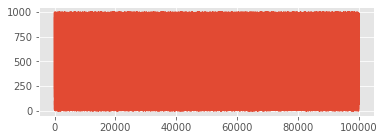

In [63]:
# uniform 의 의미?
# 히스토그램을 그렸을 때 어딘가는 많고 적은 데이터가 있다면 그것도 특징이 될 수 있는데
# 특징이 잘 구분되지 않는다면 power transform 등을 통해 값을 제곱을 해주거나 하면 특징이 좀 더 구분되어 보이기도 합니다.
s_uniform = pd.Series(np.random.uniform(0, 1000, 100000))
s_uniform.plot(figsize=(6, 2))

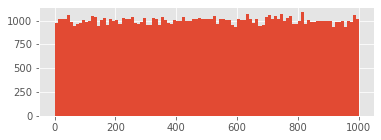

In [64]:
s_uniform.hist(bins=100, figsize=(6, 2));

In [65]:
# preprocessing - PolynomialFeatures
# degree == 차수
# np.reshape 는 array 의 shape 값을 지정해서 shape를 변환해 줍니다.

from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
print(X)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

[[0 1]
 [2 3]
 [4 5]]


,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0


In [66]:
# 히스토그램을 그렸을 때 어딘가는 많고 적은 데이터가 있다면 그것도 특징이 될 수 있는데
# 특징이 잘 구분되지 않는다면 power transform 등을 통해 값을 제곱을 해주거나 하면 특징이 좀 더 구분되어 보이기도 합니다.
house_poly = poly.fit_transform(train[["MSSubClass", "LotArea"]])
pd.DataFrame(house_poly, columns=poly.get_feature_names_out())

,1,MSSubClass,LotArea,MSSubClass^2,MSSubClass LotArea,LotArea^2
0,1.0,60.0,8450.0,3600.0,507000.0,71402500.0
1,1.0,20.0,9600.0,400.0,192000.0,92160000.0
2,1.0,60.0,11250.0,3600.0,675000.0,126562500.0
3,1.0,70.0,9550.0,4900.0,668500.0,91202500.0
4,1.0,60.0,14260.0,3600.0,855600.0,203347600.0
...,...,...,...,...,...,...
1455,1.0,60.0,7917.0,3600.0,475020.0,62678889.0
1456,1.0,20.0,13175.0,400.0,263500.0,173580625.0
1457,1.0,70.0,9042.0,4900.0,632940.0,81757764.0
1458,1.0,20.0,9717.0,400.0,194340.0,94420089.0


## 특성 선택
### 분산 기반 필터링

In [67]:
# 범주형 변수 중에 어느 하나의 값에 치중되어 분포되어있지 않은지 확인합니다.
for col in train.select_dtypes(include="O").columns:
    col_count = train[col].value_counts(1)*100
    if col_count[0] > 90:
        print(col)

Street
Utilities
LandSlope
Condition2
RoofMatl
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive
MiscFeature


In [68]:
# RoofMatl - value_counts
train["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

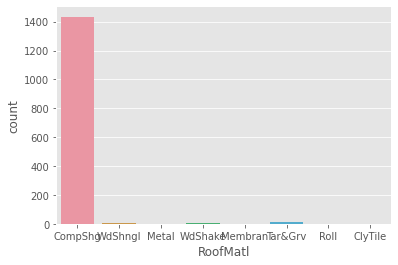

In [69]:
# RoofMatl - countplot
sns.countplot(data=train, x="RoofMatl")

### 상관관계 기반 필터링

In [70]:
# corr
corr = train.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_ss,SalePrice_mm,SalePrice_rs,SalePrice_log1p,SalePrice_ss_log1p,SalePrice_log1p_ss,MSZoning_enc
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.084284,-0.084284,-0.084284,-0.073959,-0.029286,-0.073959,0.035900
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.351799,0.351799,0.351799,0.355879,0.290977,0.355879,-0.111690
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.263843,0.263843,0.263843,0.257320,0.213117,0.257320,-0.034452
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.790982,0.790982,0.790982,0.817185,0.736647,0.817185,-0.160099
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.077856,-0.077856,-0.077856,-0.036868,-0.161575,-0.036868,0.186951
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.522897,0.522897,0.522897,0.586570,0.566532,0.586570,-0.308908
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.507101,0.507101,0.507101,0.565608,0.531381,0.565608,-0.174728
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.477493,0.477493,0.477493,0.430809,0.377197,0.430809,-0.067487
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0

In [71]:
mask = np.triu(np.ones_like(corr))

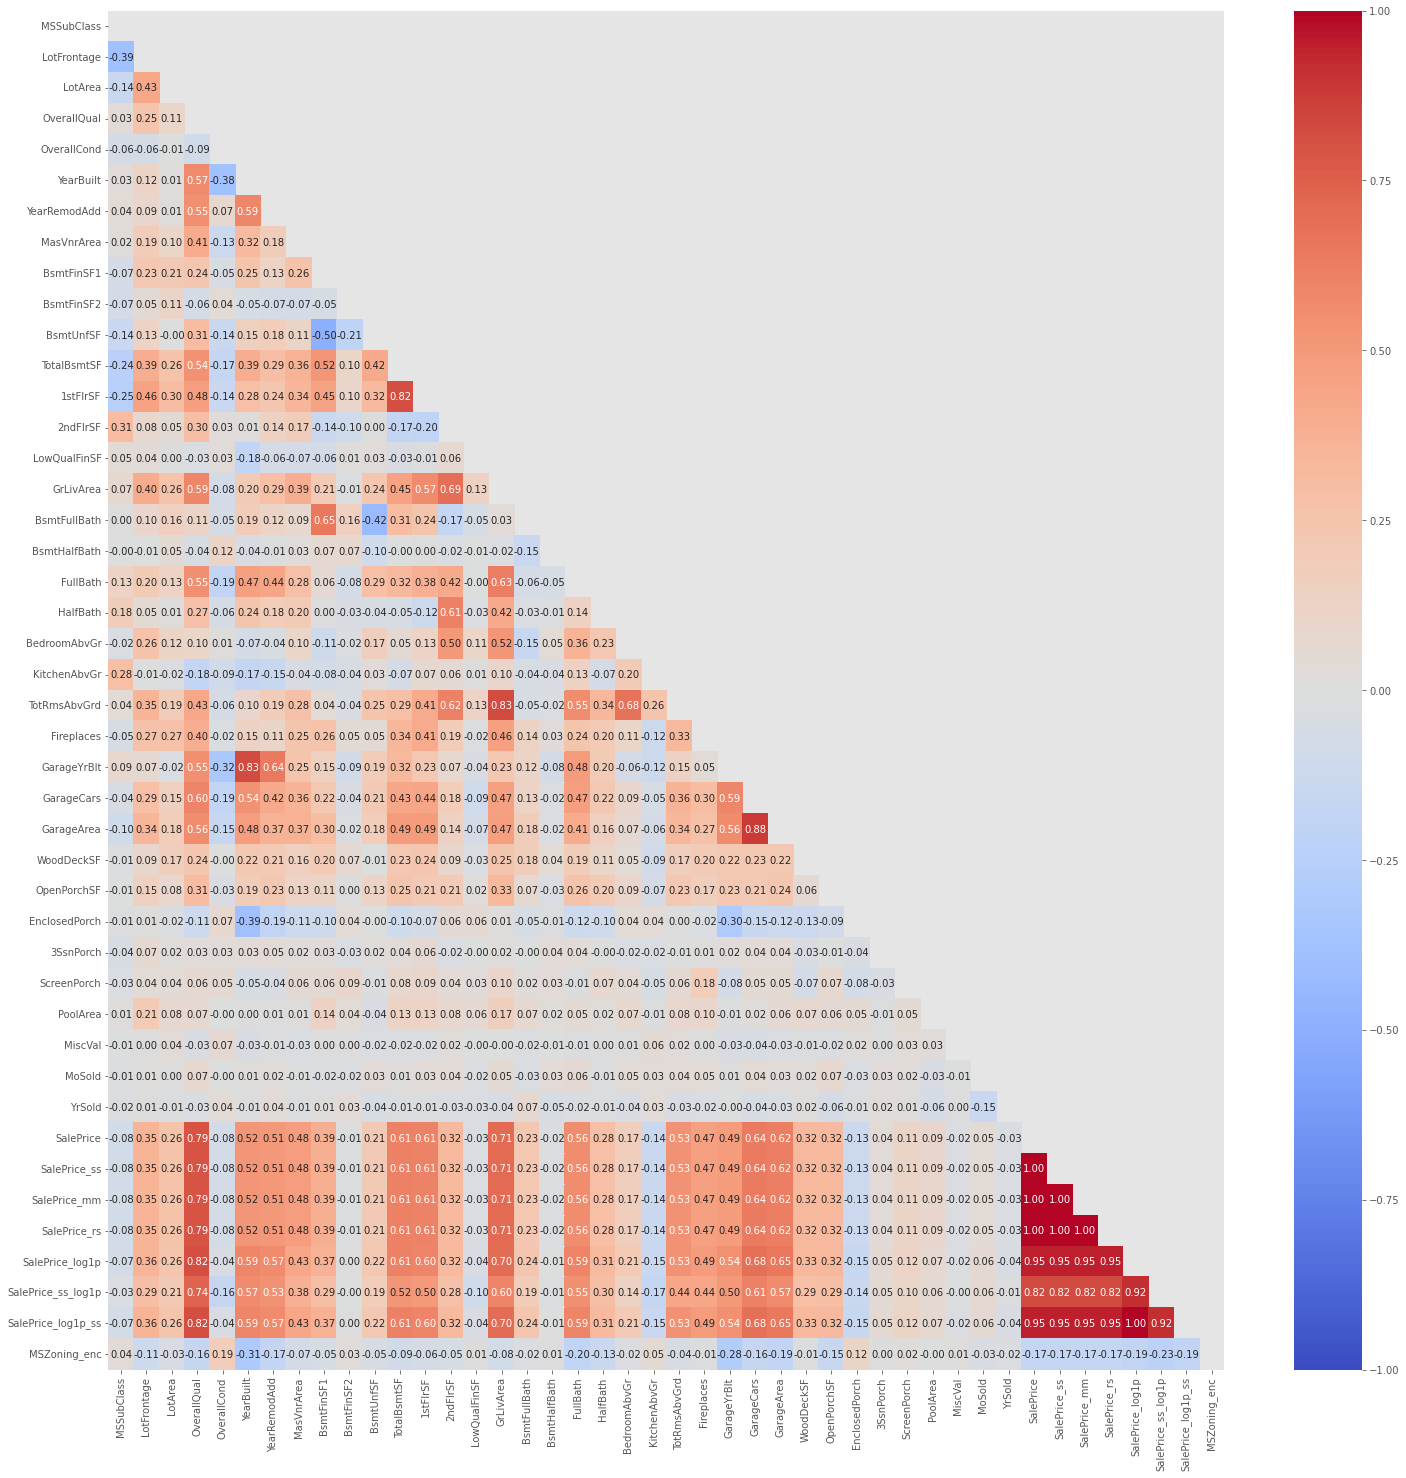

In [72]:
# heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", 
            cmap="coolwarm", vmax=1, vmin=-1,
            mask=mask
           )

In [ ]:
# ["YearBuilt", "GarageYrBlt"]
# loc[행, 열]
corr.loc["YearBuilt", "GarageYrBlt"]